In [13]:


# -*- coding: utf-8 -*-
"""
@author: Krish.Naik
"""

## MAlaria Detection using Transfer Learning

# Download The Dataset from 
#https://www.kaggle.com/iarunava/cell-images-for-detecting-malaria

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
#from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [14]:

# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'data/cell_images/train'
valid_path = 'data/cell_images/test'

# add preprocessing layer to the front of VGG
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False


In [15]:
# useful for getting number of classes
folders = glob('data/cell_images/train/*')
  

# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [16]:
# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('data/cell_images/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('data/cell_images/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 23343 images belonging to 2 classes.
Found 4215 images belonging to 2 classes.


/var/folders/z1/8c8tjdhn2z740qzvlw8cs1f80000gn/T/ipykernel_67836/722328764.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/5
730/730 [==============================] - 12458s 17s/step - loss: 0.3870 - accuracy: 0.8318 - val_loss: 0.2291 - val_accuracy: 0.9053
Epoch 2/5
730/730 [==============================] - 14186s 19s/step - loss: 0.2866 - accuracy: 0.8863 - val_loss: 0.3536 - val_accuracy: 0.8693
Epoch 3/5
730/730 [==============================] - 10658s 15s/step - loss: 0.3017 - accuracy: 0.8870 - val_loss: 0.1830 - val_accuracy: 0.9374
Epoch 4/5
730/730 [==============================] - 10574s 14s/step - loss: 0.2842 - accuracy: 0.8959 - val_loss: 0.1764 - val_accuracy: 0.9409
Epoch 5/5
730/730 [==============================] - 9457s 13s/step - loss: 0.2491 - accuracy: 0.9076 - val_loss: 0.7611 - val_accuracy: 0.7926


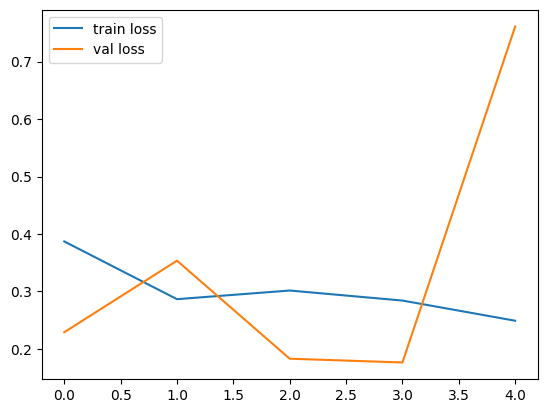

KeyError: 'acc'

<Figure size 640x480 with 0 Axes>

In [17]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)


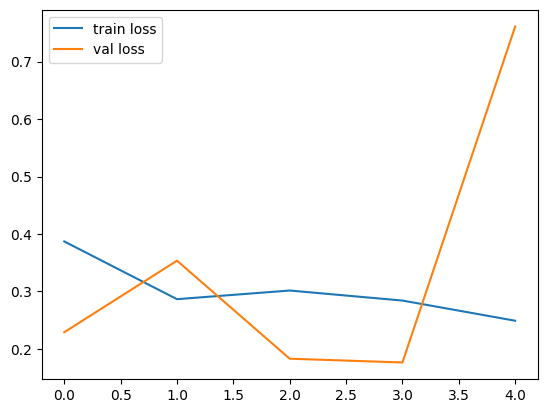

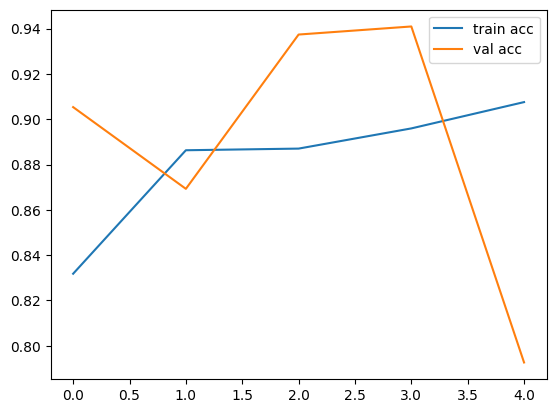

/Users/joeljoseph26/Documents/Education/Machine_and_Deep_Learning/ML-DL-projects/Image-classification-Projects/Image-Classification-Projects/env/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [18]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

import tensorflow as tf

from keras.models import load_model

model.save('malaria_model_vgg19.h5')